Verilerimizi analiz etmek için gerekli kütüphanelerimizi yükleyerek işlemlerimize başlıyoruz.


In [ ]:
import pandas as pd       # Pandas Kütüphanesi

import seaborn as sns     # Seaborn Kütüphanesi

import numpy as np        # Numpy Kütüphanesi

import matplotlib.pyplot as plt   # Mathplot Kütüphanesi

from sklearn.model_selection import train_test_split # Veri Setimizi Eğitmek için Gerekli Kütüphane

from sklearn.linear_model import LinearRegression #Veri Setinde Kullanılacak Model

from sklearn.metrics import mean_absolute_error, mean_squared_error #Modelin ne kadar iyi olduğunu test etmek için kullanılan kütüphane

from sklearn.preprocessing import OneHotEncoder #Değişken Dönüşümü için kullanılacak kütüphane

from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score # Veri setinde değişken dönüşümü için kullalıcak kütüphane




Kütüphanelerimizi yükledikten sonra Veri Setimizi bir değişkene atayarak devam ediyoruz.


In [ ]:
df=pd.read_csv("/content/country_wise_latest.csv")

Veri Setimizi kontrol ediyoruz.


In [ ]:
print(df.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

Veri Seti hakkında analiz yapabilmemiz için info metodunu çağırıyoruz

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

Veri Seti, 187 satır ve 15 sütundan oluşmakta. Sütunlar ise şu şekilde oluşmaktadır.
Country/Region, Confirmed, Deaths, Recovered, Active, New cases, New deaths, Deaths, Recovered, Deaths, Confirmed last week, 1 week change,  1 week % increase,  WHO Region       

Kolon ve sütunların analizi için describe metodunu çağırıyoruz ve daha düzgün bir ekran çıktısı almak için .T methodunu kullanıyoruz.

In [ ]:
print(df.describe().T)

                        count          mean            std    min       25%  \
Confirmed               187.0  8.813094e+04  383318.663831  10.00  1114.000   
Deaths                  187.0  3.497519e+03   14100.002482   0.00    18.500   
Recovered               187.0  5.063148e+04  190188.189643   0.00   626.500   
Active                  187.0  3.400194e+04  213326.173371   0.00   141.500   
New cases               187.0  1.222957e+03    5710.374790   0.00     4.000   
New deaths              187.0  2.895722e+01     120.037173   0.00     0.000   
New recovered           187.0  9.338128e+02    4197.719635   0.00     0.000   
Deaths / 100 Cases      187.0  3.019519e+00       3.454302   0.00     0.945   
Recovered / 100 Cases   187.0  6.482053e+01      26.287694   0.00    48.770   
Deaths / 100 Recovered  187.0           inf            NaN   0.00     1.450   
Confirmed last week     187.0  7.868248e+04  338273.676567  10.00  1051.500   
1 week change           187.0  9.448460e+03   47491.

Confirmed (Onaylanmış): Onaylanmış hasta sayısı 88 ve standart sapması oldukça yüksek. En düşük vaka sayısı 10 iken en yüksek vaka sayısı ise 4,290,259 olarak görülmekte.
Deaths (Ölümler): Ortalama ölüm sayısı 3,498 iken en düşük ölüm sayısı 0 ve en yüksek ölüm sayısı ise 148,011.
Recovered (İyileşenler): Ortalama iyileşen sayısı 50,631 iken en düşük iyileşen sayısı 0, en yüksek ise 1,846,641.
Active (Aktif Vakalar): Ortalama aktif vaka sayısı 34,002 olarak gözlemlenmekte
New cases (Yeni Vakalar): Ortalama yeni vaka sayısı 1,223 olarak gözlemlenmekte
New deaths (Yeni Ölümler): Ortalama yeni ölüm sayısı 29 olarak karşımıza çıkmakta
New recovered (Yeni İyileşenler): Ortalama yeni iyileşen sayısı 933 olarak karşımıza çıkmakta.
Deaths / 100 Cases (Vakalar Başına Ölümler): Her
100 vakada ortalama 3.02 kişi ölmüştür.
Recovered / 100 Cases (Vakalar Başına İyileşenler): Her 100 vakada ortalama 64.82 kişi hastalığı atlatmıştır.
Confirmed last week (Geçen Haftaki Onaylanmış Vakalar): Ortalama 78,682 kişi bulunmakta.
1 week change (Bir Haftalık Değişim): Ortalama 9,448'lık bir değişim seyrediyor
1 week % increase (Bir Haftalık Yüzde Artışı): Ortalama 13.61 olan bir haftalık yüzde artışı göze çarpmakta



In [ ]:
cat_col=[col for col in df.columns if df[col].dtypes in ["category","object"]]
print(f"Kategorik Degerler: {cat_col}")

Kategorik Degerler: ['Country/Region', 'WHO Region']


Kategorik değişkenlerimizi sıralamak için list_comprehension özelliğini kullanıyoruz

In [ ]:
for col in cat_col:
  print(f" {col}, sınıf değerleri :{df[col].value_counts()}")

 Country/Region, sınıf değerleri :Country/Region
Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: count, Length: 187, dtype: int64
 WHO Region, sınıf değerleri :WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64


Kategorik değişkenlerin sınıf değerlerini bulmak için value_counts kullanarak ekrana yazdırıyoruz.

In [ ]:
num_col = [col for col in df.columns if df[col].dtypes in ["float64", "int64"]]
print(f" Sayısal değerler : {num_col}")

 Sayısal değerler : ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase']


Sayısal değişkenleri bulmak için de list_comprehension özelliğinden yararlanıyoruz.

In [ ]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["float64", "int64"]]
print(f"num_but_cat : {num_but_cat}")

num_but_cat : []


Kardinali 10'dan düşük olan değerlerimizi num_but_cat değişkenine atıyoruz. Ancak 10'dan düşük bir değer olmadığı için sonuç olarak bize boş küme döndürüyor.

In [ ]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    print(f"Q1: {Q1}")
    # Q1  alt %25'lik dilim

    Q3 = df[column].quantile(0.75)
    print(f"Q3 : {Q3}")
    # Q3  üst %25'lik dilim

    IQR = Q3-Q1
    print(f"IQR : {IQR}")
    # IQR  merkezi eğilimini ve dağılım

    low = Q1-1.5*IQR
    print(f"low : {low}")
    # Alt sınır

    high = Q3+1.5*IQR
    print(f"high : {high}")
    # Üst sınır

    kosul = ((df[column] >= low) & (df[column] <= high))
    # Alt sınır ve üst sınır arasında ki değerlerimizi ayıklamak için kullanılan fonksiyon.

    clear_df = df[kosul]
    # Aykırı değerlerden ayıklamak için kullanılır.

    return clear_df
    # Temiz veri setini geri döndürür.


Yukarıda Aykırı Değer Analizimizi gerçekleştirdik.

In [ ]:
for col in num_col:
  print(col)
  df = remove_outliers(df, col)

Confirmed
Q1: 1114.0
Q3 : 40460.5
IQR : 39346.5
low : -57905.75
high : 99480.25
Deaths
Q1: 11.0
Q3 : 360.0
IQR : 349.0
low : -512.5
high : 883.5
Recovered
Q1: 292.0
Q3 : 5700.0
IQR : 5408.0
low : -7820.0
high : 13812.0
Active
Q1: 52.0
Q3 : 1920.0
IQR : 1868.0
low : -2750.0
high : 4722.0
New cases
Q1: 0.0
Q3 : 37.75
IQR : 37.75
low : -56.625
high : 94.375
New deaths
Q1: 0.0
Q3 : 0.0
IQR : 0.0
low : 0.0
high : 0.0
New recovered
Q1: 0.0
Q3 : 4.0
IQR : 4.0
low : -6.0
high : 10.0
Deaths / 100 Cases
Q1: 0.045
Q3 : 3.6475
IQR : 3.6025
low : -5.358750000000001
high : 9.05125
Recovered / 100 Cases
Q1: 63.41250000000001
Q3 : 93.6525
IQR : 30.239999999999995
low : 18.052500000000016
high : 139.0125
Deaths / 100 Recovered
Q1: 0.2
Q3 : 5.72
IQR : 5.52
low : -8.08
high : 14.0
Confirmed last week
Q1: 108.75
Q3 : 1566.75
IQR : 1458.0
low : -2078.25
high : 3753.75
1 week change
Q1: 1.0
Q3 : 48.25
IQR : 47.25
low : -69.875
high : 119.125
1 week % increase
Q1: 0.275
Q3 : 5.57
IQR : 5.295
low : -7.6674999

Aykırı değerlerimizi temizlemek için for döngüsü açıp aykırı değerlerimizi temizliyoruz.

In [ ]:
print(df.describe().T)

                        count        mean         std    min       25%  \
Confirmed                48.0  797.645833  839.063852  12.00  107.2500   
Deaths                   48.0   21.354167   27.014960   0.00    0.0000   
Recovered                48.0  630.666667  685.325682  12.00   84.7500   
Active                   48.0  145.625000  352.198845   0.00    8.7500   
New cases                48.0    3.625000    6.403540   0.00    0.0000   
New deaths               48.0    0.000000    0.000000   0.00    0.0000   
New recovered            48.0    1.104167    1.948699   0.00    0.0000   
Deaths / 100 Cases       48.0    2.161875    2.192812   0.00    0.0000   
Recovered / 100 Cases    48.0   82.684375   17.455933  27.42   79.3850   
Deaths / 100 Recovered   48.0    2.830625    3.042256   0.00    0.0000   
Confirmed last week      48.0  777.562500  826.955141  12.00  102.0000   
1 week change            48.0   20.083333   28.780041 -47.00    1.0000   
1 week % increase        48.0    3.467

Doğru sonuç döndürebildik mi anlayabilmemiz için describe methodumuzu kullanıyoruz.

In [ ]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


Boş değer ve varsa kaç tane boşluk olduğunu bulmak için yukarıdaki değişkenlerimizi kullandık.

In [ ]:
for col in num_col:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)
    print("Boşluklar Temizlendi")

Boş değer alan değişkenlerimizi ortalama değerler ile dolduruyoruz

In [ ]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


Tekrar kontrolümüzü sağlıyoruz.

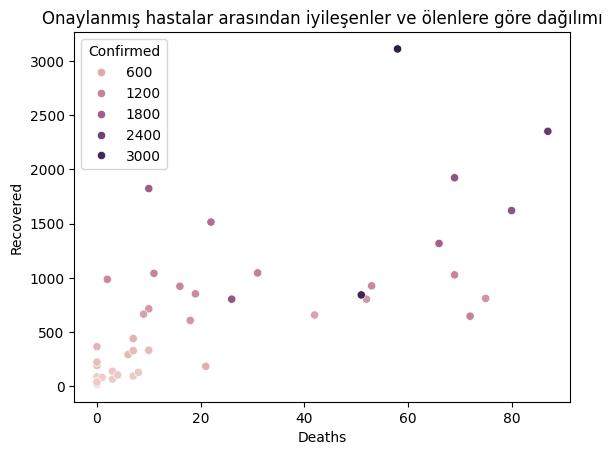

In [ ]:
sns.scatterplot(x="Deaths",y="Recovered",hue="Confirmed",data=df)
plt.title("Onaylanmış hastalar arasından iyileşenler ve ölenlere göre dağılımı")
plt.show()

Grafik, iyileşenlerin sayısının artmasını gösteriyor, ölümlerin ise azalmasını gösteriyor.

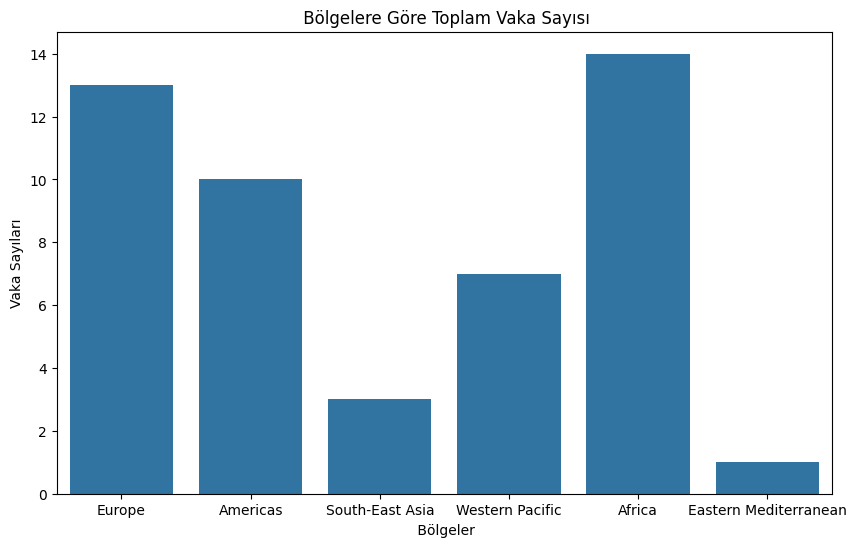

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="WHO Region")
plt.title(" Bölgelere Göre Toplam Vaka Sayısı")
plt.xlabel(" Bölgeler")
plt.ylabel("Vaka Sayıları")
plt.show()


Bölgelere göre vaka sayıları grafiğini incelediğmizde en çok vaka Avrupa bölgesinde ve bunu da Afrika ve Amerika bölgesi sırasıyla takip etmekte.

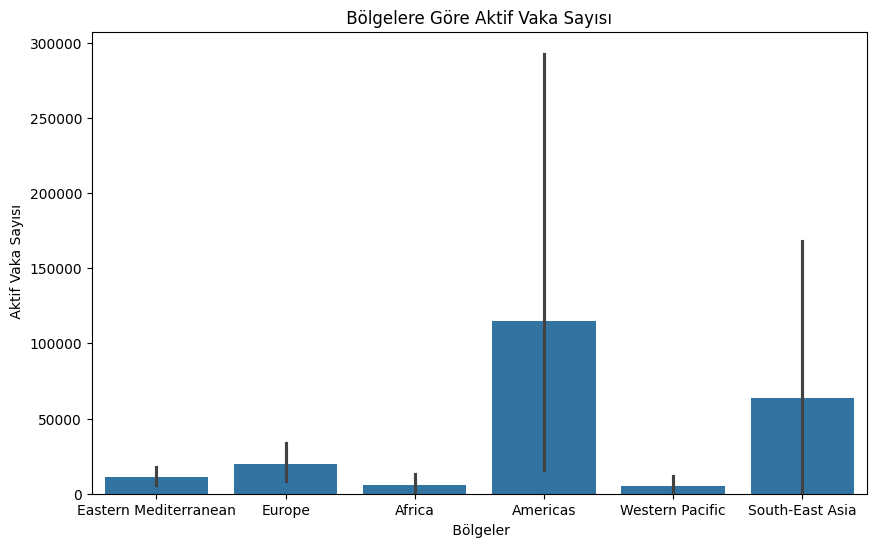

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="WHO Region", y="Active")
plt.title(" Bölgelere Göre Aktif Vaka Sayısı ")
plt.xlabel(" Bölgeler")
plt.ylabel(" Aktif Vaka Sayısı")
plt.show()

Aktif olarak vakaların göründüğü bölgeleri incelediğimizde Avrupa ve Afrika bölgelelerinde yüksek miktarda bir azalma görülürken Amerika ve ve Asya bölgesinde yüksek sayıda vaka görülmeye devam etmekte.

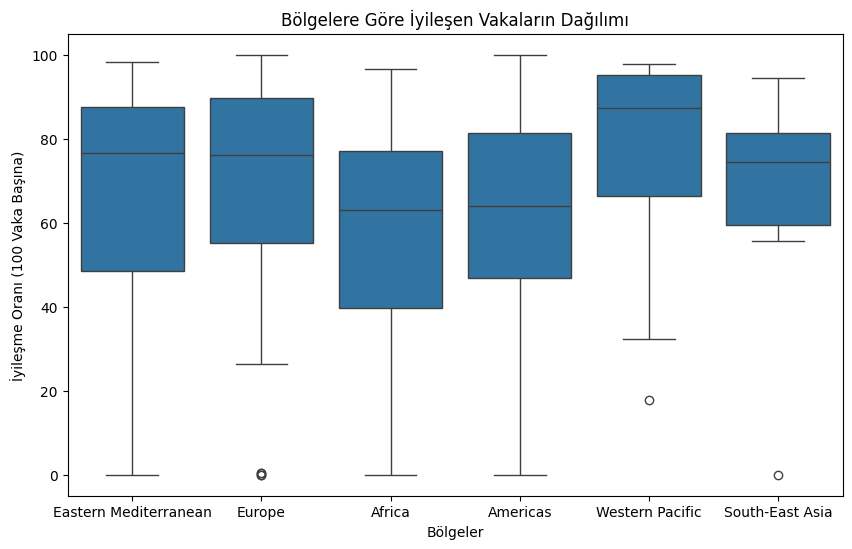

In [ ]:

# Elimde çok fazla veri bulunduğu için bir iyileşen oranı hesaplayıp daha sonra analiz yapmak istedim
df['Recovered / 100 Cases'] = (df['Recovered'] / df['Confirmed']) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="WHO Region", y="Recovered / 100 Cases")
plt.title("Bölgelere Göre İyileşen Vakaların Dağılımı")
plt.xlabel("Bölgeler")
plt.ylabel("İyileşme Oranı (100 Vaka Başına)")
plt.show()



Doğu Akdeniz bölgesinde her 100 vakadan 50 ile 85 vaka, Avrupa Bölgesinde 60 ila 87, Afrika bölgesinde bu sayı 50 ila 80 aralığında, Amerika'da 50 ila 80,
Batı Pasifik Bbölgesinde oldukça yüksek bir sayı bizleri karşılıyor 70 ila 95 kişi ile ve son olarak ise GüneyDoğu Asya Bölgesinde ise 60 ila 80 vaka arasında bir iyileşme gözlemlenmekte.

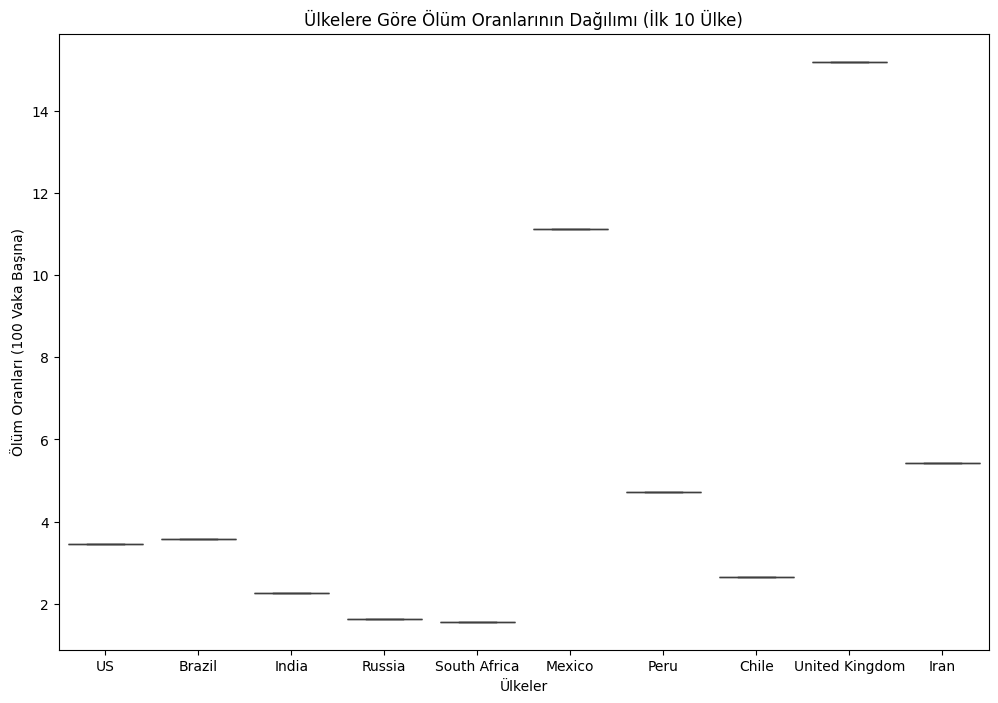

In [ ]:
# Veri Sayımızdaki fazlalıktan ötürü tekrar bir ölüm oranı alıyoruz
df["Deaths / 100 Cases"] = (df["Deaths"] / df["Confirmed"]) * 100

#İlk 10 Ülkeyi sırasıyla inceleyelim
top_countries = df.nlargest(10, "Confirmed")

plt.figure(figsize=(12, 8))
sns.boxplot(data=top_countries, x="Country/Region", y="Deaths / 100 Cases")
plt.title('Ülkelere Göre Ölüm Oranlarının Dağılımı (İlk 10 Ülke)')
plt.xlabel("Ülkeler")
plt.ylabel("Ölüm Oranları (100 Vaka Başına)")
plt.show()



Her 100 vakada en yüksek ölüm sayılarını incelediğimiz grafikte ilk sırada İngiltere bulunuyor 14 ve daha yüksek ortalamayla ki bu oldukça yüksek bir rakam daha sonra Meksika ve İran olmak üzere grafikte görünen ülkeler takip ediyor.

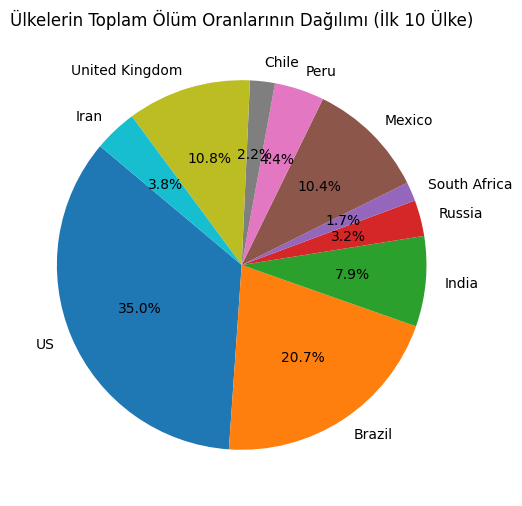

In [ ]:
# İlk 10 ülkeyi alalım
top_countries = df.nlargest(10, "Confirmed")

plt.figure(figsize=(10, 6))
plt.pie(top_countries["Deaths"], labels=top_countries["Country/Region"], autopct="%1.1f%%", startangle=140)
plt.title("Toplam Ölüm Oranlarının Dağılımı (İlk 10 Ülke)")
plt.show()


Aynı verileri bu sefer piechart grafiğinde inceleyecek olursak yüzdelerini de bu şekilde görmüş oluyoruz.

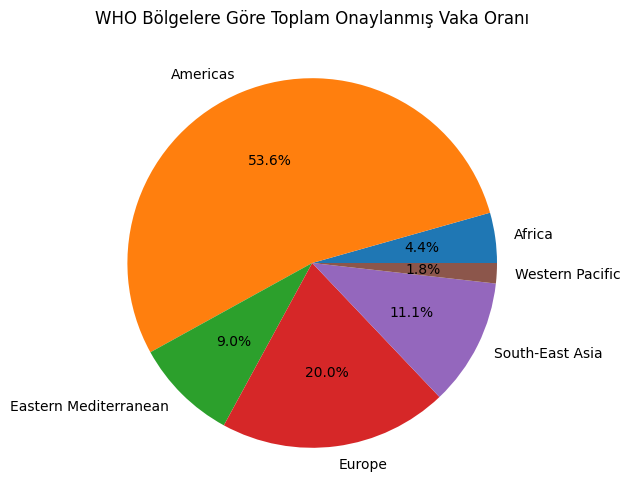

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby("WHO Region")["Confirmed"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Bölgelere Göre Onaylanmış Vaka Oranları")
plt.ylabel(" ")
plt.show()


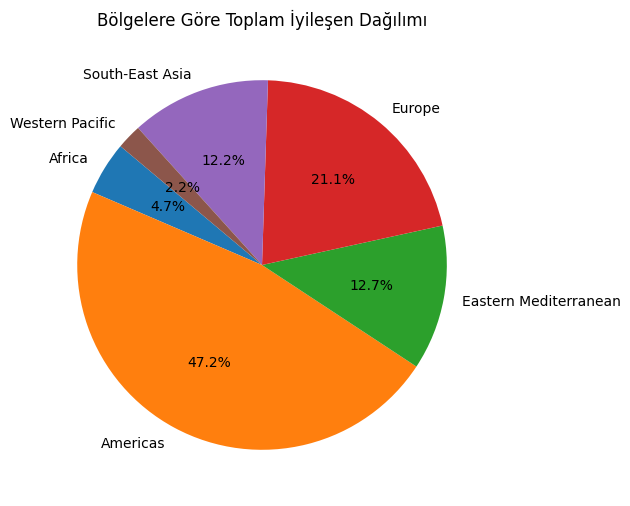

In [ ]:
recovered_by_region = df.groupby("WHO Region")["Recovered"].sum()

plt.figure(figsize=(10, 6))
plt.pie(recovered_by_region, labels=recovered_by_region.index, autopct="%1.1f%%", startangle=140)
plt.title("Bölgelere Göre Toplam İyileşen Dağılımı")
plt.show()

En yüksek iyileşme görülen bölge Amerika bölgesi büyük bir farkla karşımıza çıkmakta. Onu da Avrupa ve Doğu Asya takip etmekte.

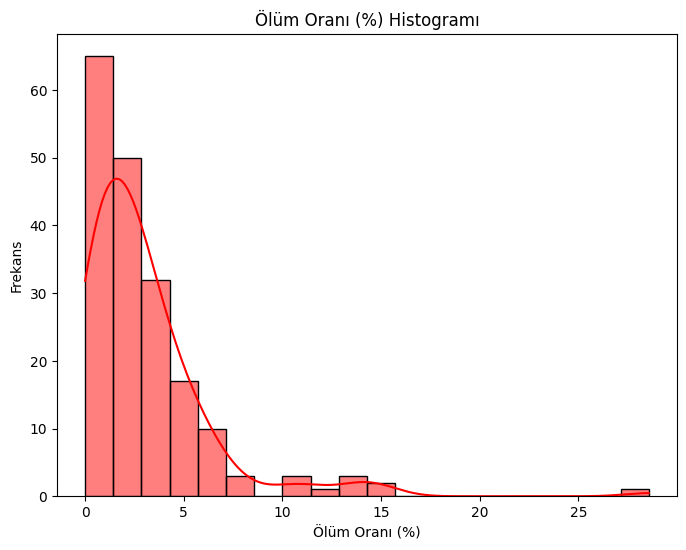

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df["Deaths / 100 Cases"],bins=20,kde=True,color="Red")
plt.title("Ölüm Oranı (%) Histogramı")
plt.xlabel("Ölüm Oranı (%)")
plt.ylabel("Frekans")
plt.show()

Ortalama ölüm oranını bize göstermektedir. Histogram, farklı ölüm oranlarının yüzdesini bize göstermekte.

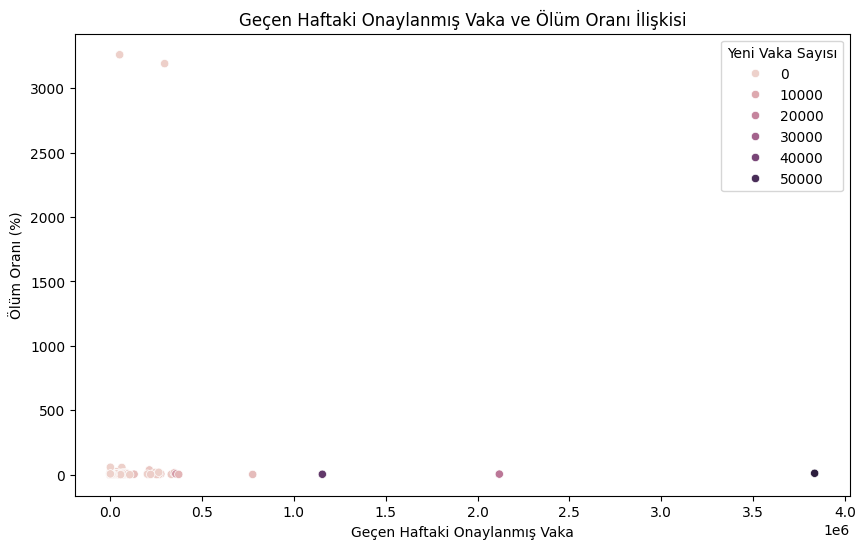

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Confirmed last week", y="Deaths / 100 Recovered", data=df, hue="New cases")
plt.title("Geçen Haftaki Onaylanmış Vaka ve Ölüm Oranı İlişkisi")
plt.xlabel("Geçen Haftaki Onaylanmış Vaka")
plt.ylabel("Ölüm Oranı (%)")
plt.legend(title="Yeni Vaka Sayısı")
plt.show()



Geçen hafta onaylanmış olan verilerden oldukça az bir sayıda hatta hiç ölüm olmamış denecek bir grafik karşımıza çıkıyor.

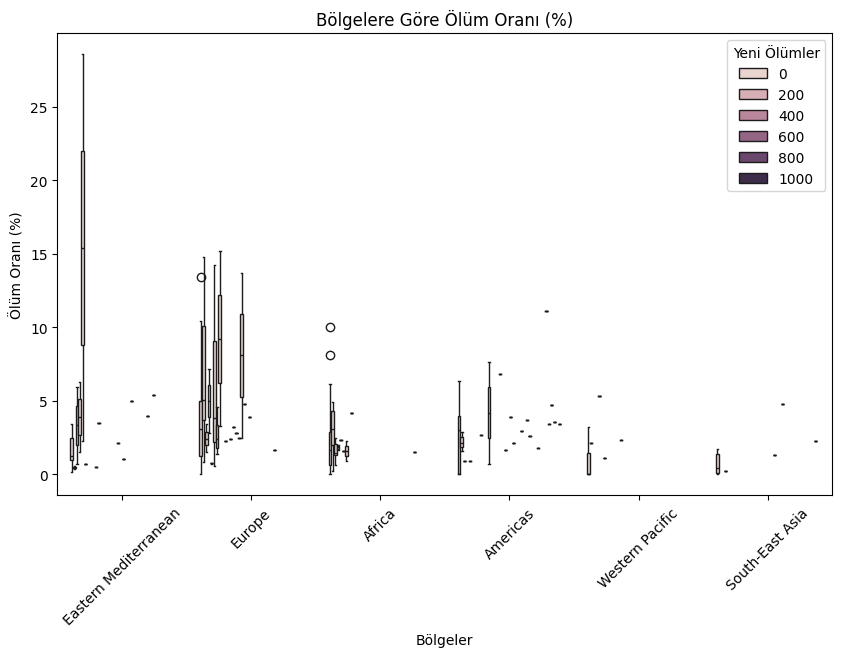

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="WHO Region", y="Deaths / 100 Cases", data=df, hue="New deaths")
plt.title("Bölgelere Göre Ölüm Oranı (%)")
plt.xlabel("Bölgeler")
plt.ylabel("Ölüm Oranı (%)")
plt.legend(title="Yeni Ölümler")
plt.xticks(rotation=45)
plt.show()


En yüksek ölüm oranı yüzdesel olarak Doğu Akdeniz bölgesinde görülmekte ve bunu Avrupa ve Afrika takip etmekte.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# 'WHO Region' sütununu Label Encoding ile dönüştürme
df['WHO Region'] = label_encoder.fit_transform(df['WHO Region'])

# Dönüştürülmüş veri setini kontrol etme
print(df.head())

# Dönüştürme işlemini doğrulama
print(df['WHO Region'].unique())

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
3                0        907       0        803      52         10   
5                1         86       1         65      18          4   
14               2        110       2         94       9          0   
19               3         99       3         86      13          4   
24               4        141       1        138       0          0   

    New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
3            0              0                5.73                  88.53   
5            0              5                3.49                  75.58   
14           0              0                6.36                  85.45   
19           0              1                0.00                  86.87   
24           0              0                2.13                  97.87   

    Deaths / 100 Recovered  Confirmed last week  1 week change  \
3                     6.48                  884   

In [ ]:
# '1 week change' sütunundaki benzersiz değerleri al
models = df['1 week change'].unique()

# Her bir model için benzersiz bir sayı atayacak bir sözlük oluştur
model_map = {model: i for i, model in enumerate(models)}

# '1 week change' sütununu sayısal türe dönüştür
df['1 week change'] = df['1 week change'].map(model_map)



In [ ]:
# 'Deaths' sütunundaki benzersiz değerleri al
deaths = df["Deaths"].unique()

# Her bir ölüm sayısı için benzersiz bir sayı atayacak bir sözlük oluştur
deaths_map = {death: i for i, death in enumerate(deaths)}

# 'Deaths' sütununu sayısal türe dönüştür
df["Deaths_mapped"] = df["Deaths"].map(deaths_map)



In [ ]:
# 'Country/Region' sütununu sayısal değerlere dönüştürmek için map oluşturma
country_map = {country: i for i, country in enumerate(df["Country/Region"].unique())}
df["Country/Region"] = df["Country/Region"].map(country_map)

# '1 week change' sütununu sayısal değerlere dönüştürmek için map oluşturma
change_map = {change: i for i, change in enumerate(df["1 week change"].unique())}
df["1 week change"] = df["1 week change"].map(change_map)

# 'Deaths' sütununu sayısal değerlere dönüştürmek için map oluşturma
deaths_map = {death: i for i, death in enumerate(df["Deaths"].unique())}
df["Deaths"] = df["Deaths"].map(deaths_map)




In [ ]:
#Bağımsız Değişkenler
X=df[["Country/Region","Confirmed","Recovered","Active","New cases","New deaths","New recovered","Deaths / 100 Cases","Recovered / 100 Cases","Deaths / 100 Recovered","Confirmed last week","1 week change","1 week % increase","WHO Region"]]
#Bağımlı Değişkenler
y=df["Deaths"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Modelimizin test değerlerini belirledik

In [ ]:
print(X_train.shape)
print(X_test.shape)
#Satır ve Sütun sayılarımızı görmek için shape komutundan yararlanıyoruz

(38, 14)
(10, 14)


In [ ]:
model = LinearRegression()

In [ ]:
print(X_train.dtypes)

Country/Region              int64
Confirmed                   int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                  int64
dtype: object


In [ ]:
model.fit(X_train, y_train)
#Fit metoduyla modelimize veri setini öğretmeye başlıyoruz



LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
#Modelden tahmin yapması için bunu kullanmamız gerekiyor.



In [ ]:
MAE = mean_absolute_error(y_test, y_pred)

print(f"Ortalama Mutlak Hata : {MAE}")

#Ortalama Mutlak Hatayı bulmak için MAE kullanıyoruz.

Ortalama Mutlak Hata : 11.307780959273263


In [ ]:
MSE = mean_squared_error(y_test, y_pred)

print(f"Ortalama Kare Hata : {MSE}")

#Ortalama kare hatayı bulmak icin MSE kullanıyoruz.

Ortalama Kare Hata : 417.1876985765486


In [ ]:
print("Tahmin Sonuçları:")
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions_df)

#Tahmin Sonuçlarımız burada gözükmekte

Tahmin Sonuçları:
     Actual  Predicted
100      17   7.109079
149      23  27.003083
98       16  21.076674
167      25  31.390297
94        3   2.473429
142       3   6.240854
54        9  66.311397
72       12  38.381480
24        1   1.024792
95       15  14.768260


In [ ]:
new_data = pd.DataFrame({
    "Country/Region": [5],
    "Confirmed": [12],
    "Recovered": [7],
    "Active": [11],
    "New cases": [28],
    "New deaths": [3],
    "New recovered": [9],
    "Deaths / 100 Cases": [12],
    "Recovered / 100 Cases": [35],
    "Deaths / 100 Recovered": [21],
    "Confirmed last week": [4],
    "1 week change": [2],
    "1 week % increase": [1],
    "WHO Region": [45]
})

prediction = model.predict(new_data)
print("Tahmin edilen durum:", prediction)

# Örnek verilerimizin de içlerini doldurarak yeniden bir tahmin modellemesi oluşturabiliriz.


Tahmin edilen durum: [1.26108428]


Özetlemek gerekirse, modelimizin performansını göstermek için önceki hataları ve sonuçları dikkate alarak, modelin giderek daha iyi tahminler yapabildiğini vurgulayabiliriz. Bu, modelimizi diğerlerine tercih edilebilir kılan önemli bir özelliktir.

